## Algerian Forest Fires Dataset
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
RH : Relative Humidity in %: 21 to 90
Ws :Wind speed in km/h: 6 to 29
Rain: total day in mm: 0 to 16.8 FWI Components
Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
Drought Code (DC) index from the FWI system: 7 to 220.4
Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
Buildup Index (BUI) index from the FWI system: 1.1 to 68
Fire Weather Index (FWI) Index: 0 to 31.1
Classes: two classes, namely Fire and not Fire

In [1]:
import pandas as pd  # For data manipulation and analysis, particularly for handling dataframes.
import numpy as np    # For numerical operations and working with arrays.   
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations in Python.
import seaborn as sns  # For making statistical graphics, built on top of matplotlib.
%matplotlib inline       

In [8]:
dataset=pd.read_csv('C:\Codes\ML\Algerian_forest_fires_dataset_UPDATE.csv',header=1) # pd.read_csv reads thr csv file nd loads it in the notebook, header=1 to skip the first row

In [9]:
dataset.head() # Displaying the first five rows of the dataframe to get an overview of the data.

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [10]:
dataset.info()  # Displaying a small summary of the dataframe, including the number of entries, column names, non-null counts, and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data cleaning

In [14]:
## missing vales or null values 
dataset[dataset.isnull().any(axis=1)]  # Selecting and displaying rows in the dataframe that contain any missing values.

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [26]:
df=dataset #assigning new variable for easy use 
df.loc[:122,"Region"]=0 # Setting the 'Region' column to 0 for the first 123 rows (index 0 to 122)
df.loc[122:,"Region"]=1 # Setting the 'Region' column to 1 for the remaining rows (index 122 onwards)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [28]:
df[['Region']]=df[['Region']].astype(int) # Converting the 'Region' column to integer type

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [30]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [31]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [33]:
## Removing the null values
df=df.dropna().reset_index(drop=True) # Dropping rows with missing values and resetting the index.

In [34]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [35]:
df.isnull().sum() # Counting the number of missing values in each column of the dataframe, as below we get all the values as zeros we have done it correctly and removed all the null values

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [36]:
df.iloc[[122]] # Selecting and displaying the row at index 122 from the dataframe.

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [38]:
##remove the 122nd row cuz it is a repeating row  
df=df.drop(122).reset_index(drop=True)

In [39]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1


In [41]:
df.columns #obviously this shows the columns, now we see unwanted spaces between few clomns , so we remove them 

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [43]:
## fix spaces in the column names
df.columns=df.columns.str.strip() # Removing any leading or trailing whitespace from the column names
df.columns 


Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### Now lets change the required columns as integer and float values from object 

#### from month to WS convert to int and from Rain to FWI to float 

In [82]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          242 non-null    int32 
 1   month        242 non-null    int32 
 2   year         242 non-null    int32 
 3   Temperature  242 non-null    int32 
 4   RH           242 non-null    int32 
 5   Ws           242 non-null    int32 
 6   Rain         242 non-null    object
 7   FFMC         242 non-null    object
 8   DMC          242 non-null    object
 9   DC           242 non-null    object
 10  ISI          242 non-null    object
 11  BUI          242 non-null    object
 12  FWI          242 non-null    object
 13  Classes      242 non-null    object
 14  Region       242 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 21.9+ KB


In [47]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int32  
 1   month        242 non-null    int32  
 2   year         242 non-null    int32  
 3   Temperature  242 non-null    int32  
 4   RH           242 non-null    int32  
 5   Ws           242 non-null    int32  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 21.9+ KB


In [50]:
df.describe() # Generating summary statistics for numerical columns in the dataframe, including count, mean, standard deviation, min, max, and quartiles

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,242.000000,242.000000,242.0,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,15.822314,7.508264,2012.0,32.152893,62.004132,15.508264,0.763223,77.928099,14.730992,49.601240,4.759504,16.747934,7.063636,0.495868
std,8.809501,1.112888,0.0,3.635545,14.847635,2.808171,2.007354,14.316912,12.393811,47.690192,4.154248,14.229690,7.442923,0.501019
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.250000,14.000000,0.000000,72.375000,5.800000,14.325000,1.400000,6.025000,0.725000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.250000,3.500000,12.450000,4.450000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.750000,17.000000,0.500000,88.300000,20.850000,70.050000,7.275000,22.775000,11.525000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [72]:
## Lets save the cleaned dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)  # Saving the dataframe to a CSV file without including the index

## Exploratory Data Analysis

In [95]:
## we dont need day month and year so lets drop it
df_copy=df.drop(['day','month','year'],axis=1) # Creating a copy of the dataframe without the 'day', 'month', and 'year' columns

In [96]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [102]:
df_copy['Classes'].value_counts() # Counting unique values in 'Classes'

1    240
0      2
Name: Classes, dtype: int64

In [123]:
df_copy['Classes'] = df_copy['Classes'].astype(str) # Converting the 'Classes' column to string type to make the following change 

# Encoding of the categories in classes
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),1,0) # Converting 'Classes' to 1 if it contains 'not fire', otherwise 0

In [124]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [125]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
241,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [126]:
df_copy['Classes'].value_counts()

0    242
Name: Classes, dtype: int64

C:\Users\nipun\AppData\Local\Temp\ipykernel_31872\1497677876.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


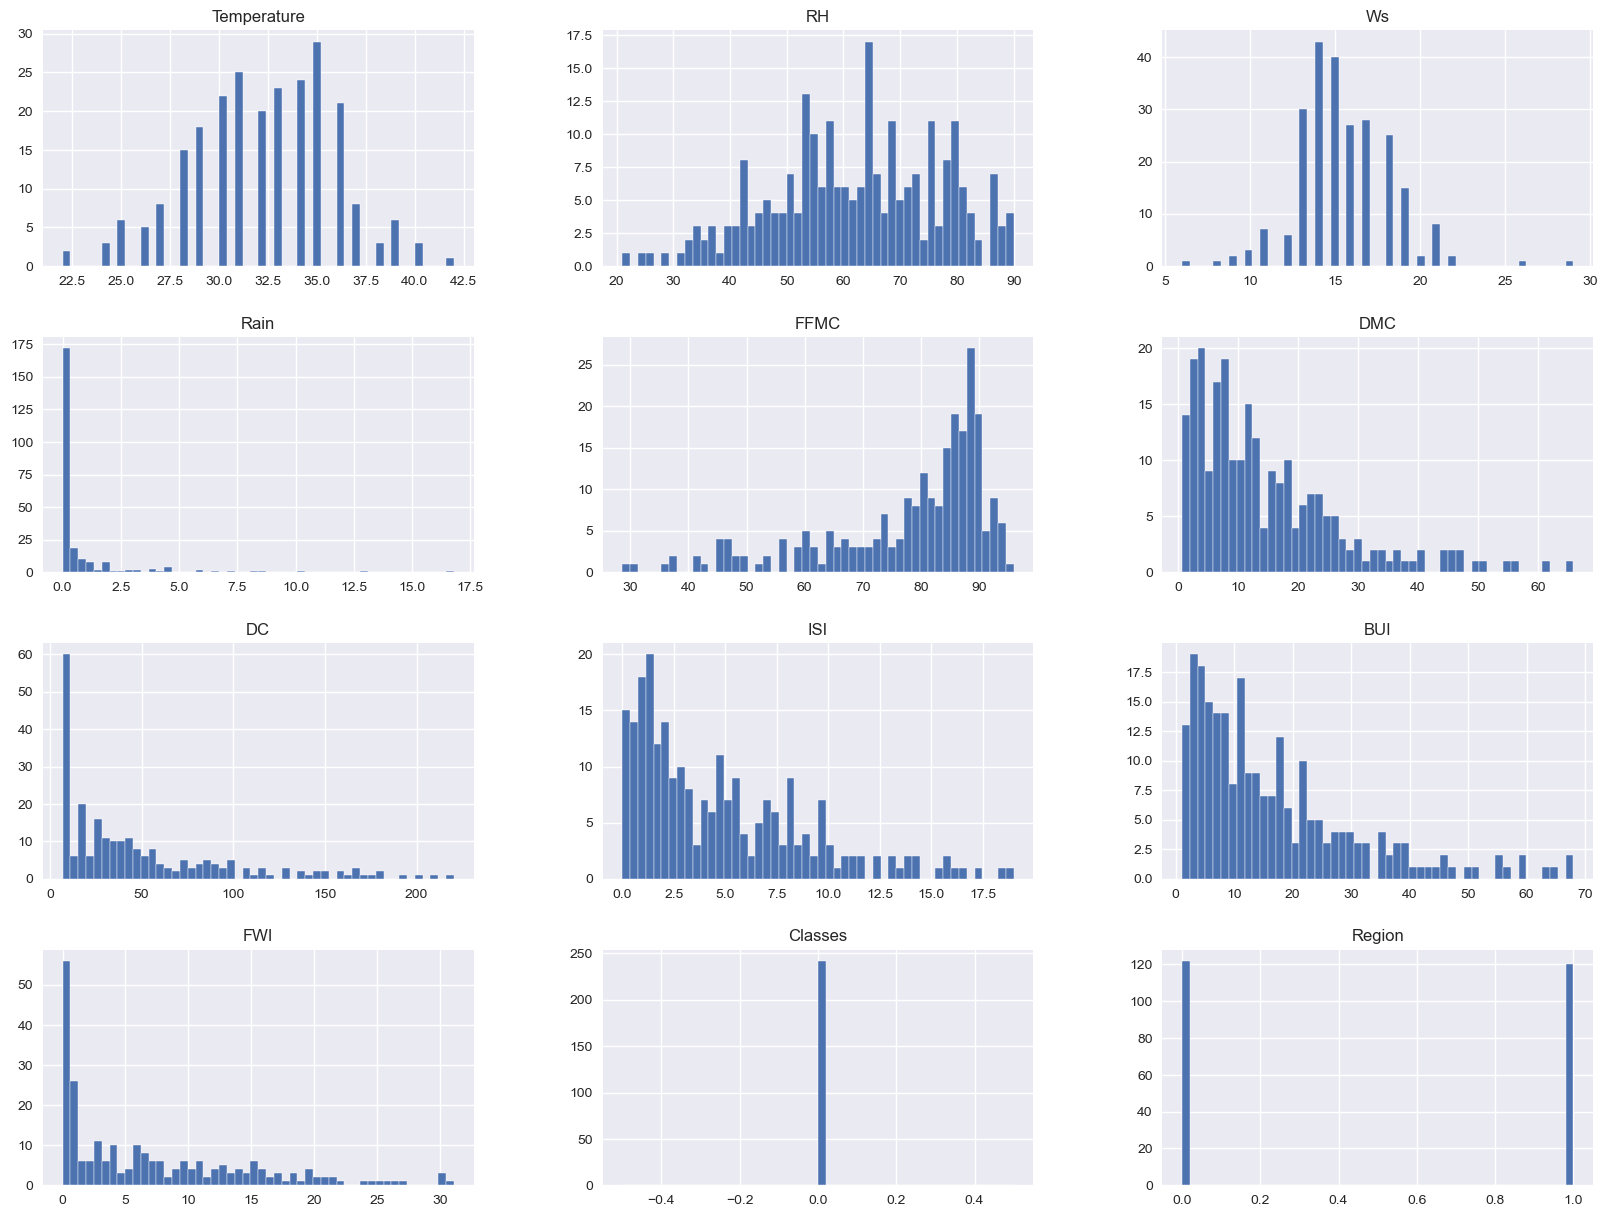

In [132]:
## Plot desnity plot for all features for data visualisation
plt.style.use('seaborn') # Applying the 'seaborn' style to the plots for better aesthetics
df_copy.hist(bins=50,figsize=(20,15))  # Creating histograms for all numerical columns in df_copy with 50 bins, setting figure size to 20x15 inches
plt.show() # Displaying the histograms

In [140]:
## Percentage for Pie Chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100  # Calculating the percentage of each unique value in the 'Classes' column , (normalize=True) this returns the proportion of each unique value

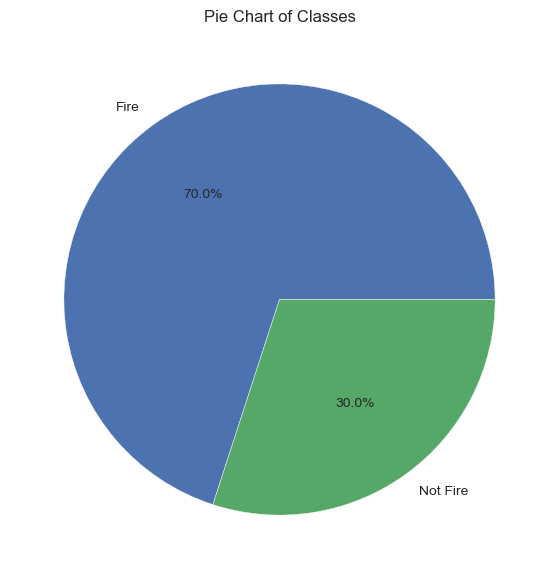

In [144]:
# plotting piechart
percentage = [70, 30]  # The percentages for each class
classlabels = ["Fire", "Not Fire"]  # The labels for each class
plt.figure(figsize=(12, 7)) # Setting the figure size to 12x7 inches
plt.pie(percentage, labels=classlabels, autopct='%1.1f%%') # Creating a pie chart with the given percentages and labels, displaying each percentage to 1 decimal place
plt.title("Pie Chart of Classes") # Adding a title to the pie chart
plt.show() # Displaying the pie chart

In [145]:
##correlation

In [146]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651791,-0.285644,-0.326499,0.679270,0.486494,0.376720,0.604948,0.460533,0.567506,NaN,0.270295
RH,-0.651791,1.000000,0.248148,0.222604,-0.644536,-0.407180,-0.225293,-0.686103,-0.352357,-0.580109,NaN,-0.406348
Ws,-0.285644,0.248148,1.000000,0.171896,-0.175324,-0.005819,0.075031,0.003408,0.026542,0.027768,NaN,-0.176928
Rain,-0.326499,0.222604,0.171896,1.000000,-0.546470,-0.289482,-0.298600,-0.348334,-0.300574,-0.325112,NaN,-0.039965
FFMC,0.679270,-0.644536,-0.175324,-0.546470,1.000000,0.601527,0.505185,0.738754,0.589881,0.689822,NaN,0.229726
DMC,0.486494,-0.407180,-0.005819,-0.289482,0.601527,1.000000,0.875511,0.679150,0.982178,0.875405,NaN,0.196981
DC,0.376720,-0.225293,0.075031,-0.298600,0.505185,0.875511,1.000000,0.506897,0.941809,0.738663,NaN,-0.075412
ISI,0.604948,-0.686103,0.003408,-0.348334,0.738754,0.679150,0.506897,1.000000,0.642650,0.922613,NaN,0.268456
BUI,0.460533,-0.352357,0.026542,-0.300574,0.589881,0.982178,0.941809,0.642650,1.000000,0.857449,NaN,0.093849
FWI,0.567506,-0.580109,0.027768,-0.325112,0.689822,0.875405,0.738663,0.922613,0.857449,1.000000,NaN,0.201695


C:\Users\nipun\AppData\Local\Temp\ipykernel_31872\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

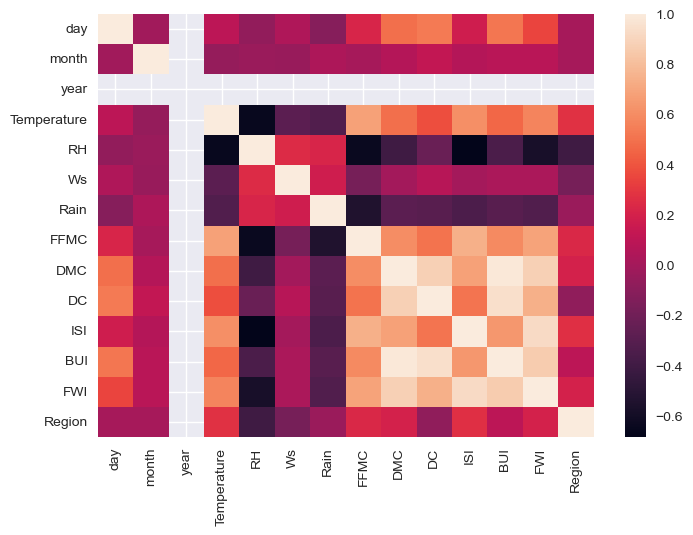

In [149]:
sns.heatmap(df.corr()) # Creating a heatmap to visualize the correlation matrix of the dataframe

<Axes: >

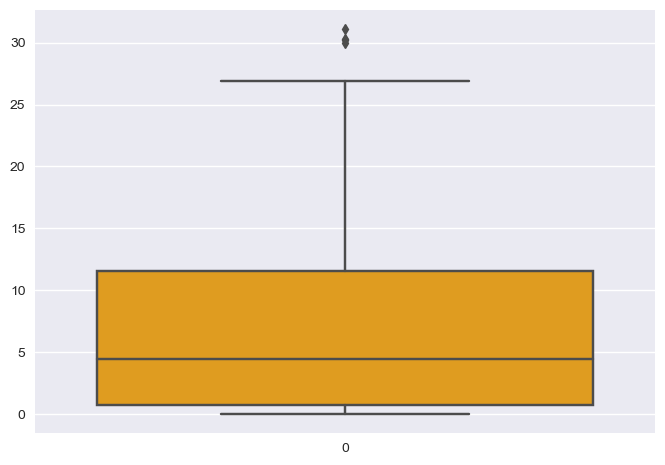

In [153]:
##Box Plots 
sns.boxplot(df['FWI'],color='orange')

In [155]:
# Not Required , Just for better accces 
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire') # Setting 'Classes' to 'not fire' if it contains 'not fire', otherwise to 'fire' 

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

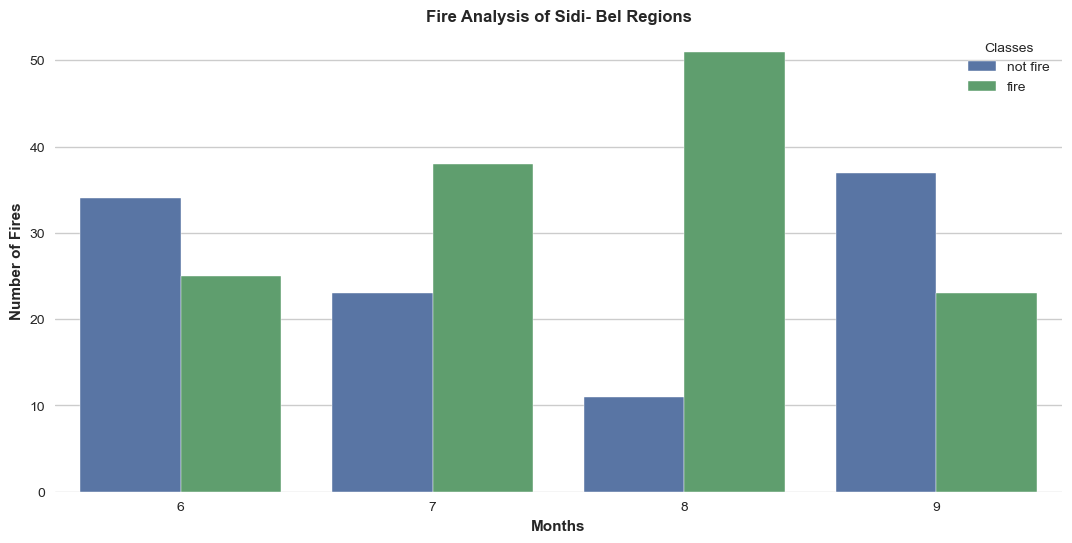

In [160]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==1] # Creating a temporary dataframe with only the rows where 'Region' equals 1.
plt.subplots(figsize=(13,6)) # Setting up a figure with size 13x6 inches
sns.set_style('whitegrid') # Applying the 'whitegrid' style to the plot for better readability
sns.countplot(x='month',hue='Classes',data=df) # Creating a count plot to show the number of fires per month, with different colors for 'Classes'
plt.ylabel('Number of Fires',weight='bold') # Setting the y-axis label with bold font
plt.xlabel('Months',weight='bold') # Same with the x lable 
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold') # TITLE in bold

Text(0.5, 1.0, 'Fire Analysis of Brajala Regions')

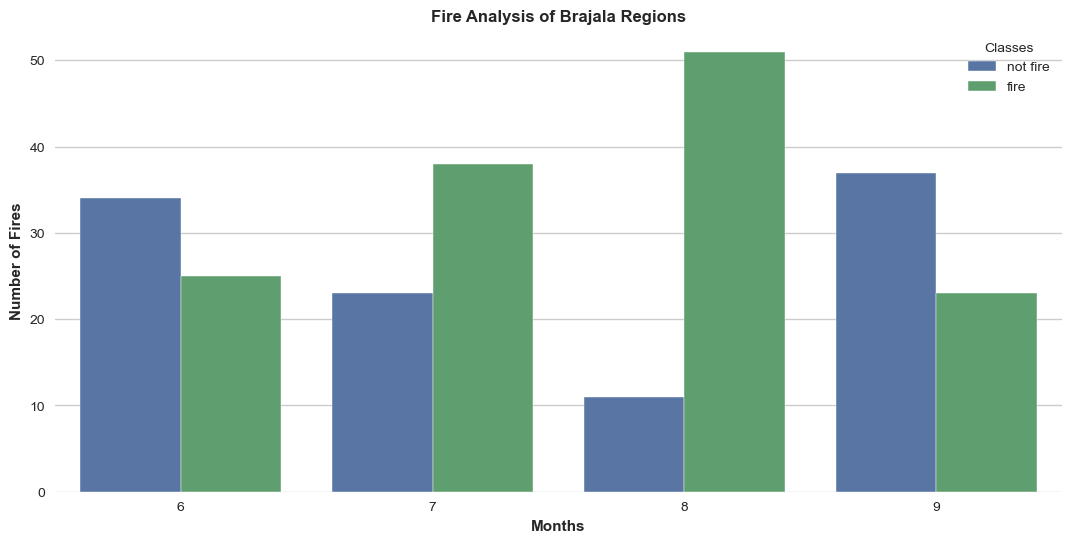

In [161]:
dftemp=df.loc[df['Region']==0] # Creating a temporary dataframe with only the rows where 'Region' equals 1
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brajala Regions",weight='bold')

Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

Less Fires was on September